<a href="https://colab.research.google.com/github/Giriankur/Project_06/blob/main/Project_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project No- 06
## Pharmaceutical Sales prediction across multiple store

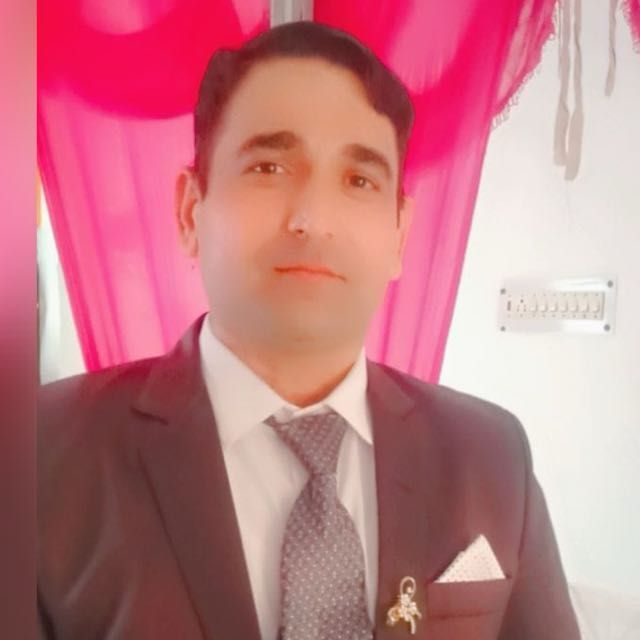

In [ ]:
# Task: 1 (Exploration of Customer purchasing behaviour)

In [ ]:
import logging
# create a logger
logger = logging.getLogger('sales_prediction_logger')
logger.setLevel(logging.DEBUG)

# create a console handler
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)

# create a file handler
fh = logging.FileHandler('sales_prediction.log')
fh.setLevel(logging.ERROR)

#create a log format
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
fh.setFormatter(formatter)

# add the handlers to the logger
logger.addHandler(ch)
logger.addHandler(fh)

# log some messages
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')

# remove the handlers
logger.removeHandler(ch)
logger.removeHandler(fh)




DEBUG:sales_prediction_logger:This is a debug message
2024-11-01 22:43:19,569 - sales_prediction_logger - INFO - This is an info message
INFO:sales_prediction_logger:This is an info message
2024-11-01 22:43:19,573 - sales_prediction_logger - WARNING - This is a warning message
2024-11-01 22:43:19,576 - sales_prediction_logger - ERROR - This is an error message
ERROR:sales_prediction_logger:This is an error message
2024-11-01 22:43:19,578 - sales_prediction_logger - CRITICAL - This is a critical message
CRITICAL:sales_prediction_logger:This is a critical message


In [ ]:
import logging
logging.basicConfig(filename='sales_prediction.log', level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
def sales_prediction(tv, radio, newspaper):
  logging.debug('This is a debug message')
  logging.info('This is an info message')
  logging.warning('This is a warning message')
  logging.error('This is an error message')
  logging.critical('This is a critical message')
  return tv + radio + newspaper

sales_prediction(10, 20, 30)
print(sales_prediction(10, 20, 30))


ERROR:root:This is an error message
CRITICAL:root:This is a critical message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


60


##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
## Import Data load

In [ ]:
sample_data = pd.read_csv('/content/sample_submission.csv')
store_data = pd.read_csv('/content/store.csv')
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')



In [ ]:
# Top head
sample_data.head()


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
store_data.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
train_data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
# Tail
sample_data.tail()

,Id,Sales
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0
41087,41088,0


In [ ]:
store_data.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
train_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
test_data.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [ ]:
# check for the data Shape

In [ ]:
store_data.shape

(1115, 10)

In [ ]:
train_data.shape

(1017209, 9)

In [ ]:
test_data.shape

(41088, 8)

In [ ]:
# Check for info

In [ ]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [ ]:
# check for data types

In [ ]:
sample_data.dtypes

,0
Id,int64
Sales,int64


In [ ]:
store_data.dtypes

,0
Store,int64
StoreType,object
Assortment,object
CompetitionDistance,float64
CompetitionOpenSinceMonth,float64
CompetitionOpenSinceYear,float64
Promo2,int64
Promo2SinceWeek,float64
Promo2SinceYear,float64
PromoInterval,object


In [ ]:
store_data.dtypes

,0
Store,int64
StoreType,object
Assortment,object
CompetitionDistance,float64
CompetitionOpenSinceMonth,float64
CompetitionOpenSinceYear,float64
Promo2,int64
Promo2SinceWeek,float64
Promo2SinceYear,float64
PromoInterval,object


In [ ]:
train_data.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64


In [ ]:
test_data.dtypes

,0
Id,int64
Store,int64
DayOfWeek,int64
Date,object
Open,float64
Promo,int64
StateHoliday,object
SchoolHoliday,int64


In [ ]:
# Check for null values

In [ ]:
sample_data.isnull().sum()

,0
Id,0
Sales,0


In [ ]:
store_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
train_data.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
test_data.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
# check for duplicate values

In [ ]:
sample_data.duplicated().sum()

0

In [ ]:
store_data.duplicated().sum()

0

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
test_data.duplicated().sum()

0

In [ ]:
## fillna data in the mode,mean
def get_categorical_and_numerical_columns(store_data):
  categoricals , numericals = [] , []
  for col in store_data.columns.tolist():
    if store_data[col].dtypes == "object":
      categoricals.append(col)
    else:
      numericals.append(col)

In [ ]:
for col in store_data.columns.tolist():
  if store_data[col].dtypes == "object":
    store_data[col] = store_data[col].fillna(store_data[col].mode()[0])
  else:
    store_data[col] = store_data[col].fillna(store_data[col].mean())

In [ ]:
## null value replace for the 0

In [ ]:
test_data.fillna(0, inplace=True)

In [ ]:
# Check null vallues

In [ ]:
test_data.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
store_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [ ]:
#percentage of missing value

In [ ]:
store_data.isnull().sum()/len(store_data)*100

,0
Store,0.0
StoreType,0.0
Assortment,0.0
CompetitionDistance,0.0
CompetitionOpenSinceMonth,0.0
CompetitionOpenSinceYear,0.0
Promo2,0.0
Promo2SinceWeek,0.0
Promo2SinceYear,0.0
PromoInterval,0.0


In [ ]:
# check for the  data count

In [ ]:
store_data.count()

,0
Store,1115
StoreType,1115
Assortment,1115
CompetitionDistance,1115
CompetitionOpenSinceMonth,1115
CompetitionOpenSinceYear,1115
Promo2,1115
Promo2SinceWeek,1115
Promo2SinceYear,1115
PromoInterval,1115


In [ ]:
train_data.count()

,0
Store,1017209
DayOfWeek,1017209
Date,1017209
Sales,1017209
Customers,1017209
Open,1017209
Promo,1017209
StateHoliday,1017209
SchoolHoliday,1017209


In [ ]:
test_data.count()

,0
Id,41088
Store,41088
DayOfWeek,41088
Date,41088
Open,41088
Promo,41088
StateHoliday,41088
SchoolHoliday,41088


In [ ]:
# Check the summary

In [ ]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7652.849306,2.653302,5.117695,0.500078,10.115915,1.198099
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,22.000000,2011.763573
50%,558.00000,2330.000000,7.224704,2008.668857,1.000000,23.595447,2011.763573
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,23.595447,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Check the summary of object data

In [ ]:
store_data.describe(include='object')

,StoreType,Assortment,PromoInterval
count,1115,1115,1115
unique,4,3,3
top,a,a,"Jan,Apr,Jul,Oct"
freq,602,593,879


In [ ]:
train_data.describe(include='object')

,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,2015-07-31,0
freq,1115,855087


In [ ]:
# Check the summary of transpose

In [ ]:
store_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.500000,558.000000,836.500000,1115.0
CompetitionDistance,1115.0,5404.901079,7652.849306,20.0,720.000000,2330.000000,6875.000000,75860.0
CompetitionOpenSinceMonth,1115.0,7.224704,2.653302,1.0,6.000000,7.224704,9.000000,12.0
CompetitionOpenSinceYear,1115.0,2008.668857,5.117695,1900.0,2008.000000,2008.668857,2011.000000,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.000000,1.000000,1.000000,1.0
Promo2SinceWeek,1115.0,23.595447,10.115915,1.0,22.000000,23.595447,23.595447,50.0
Promo2SinceYear,1115.0,2011.763573,1.198099,2009.0,2011.763573,2011.763573,2012.000000,2015.0


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [ ]:
#How many nunique

In [ ]:
store_data.nunique()

,0
Store,1115
StoreType,4
Assortment,3
CompetitionDistance,655
CompetitionOpenSinceMonth,13
CompetitionOpenSinceYear,24
Promo2,2
Promo2SinceWeek,25
Promo2SinceYear,8
PromoInterval,3


In [ ]:
train_data.nunique()

,0
Store,1115
DayOfWeek,7
Date,942
Sales,21734
Customers,4086
Open,2
Promo,2
StateHoliday,5
SchoolHoliday,2


In [ ]:
# check for the column

In [ ]:
store_data.columns # Store_data

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
categorical_columns = store_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = store_data.select_dtypes(include=['number']).columns.tolist()

In [ ]:
train_data.columns # Train_data

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
categorical_columns_train_data = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_train_data = train_data.select_dtypes(include=['number']).columns.tolist()

In [ ]:
#Check for the  numerical column

In [ ]:
numerical_columns

['Store',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [ ]:
numerical_columns_train_data

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

In [ ]:
# check for the calegory column

In [ ]:
categorical_columns

['StoreType', 'Assortment', 'PromoInterval']

In [ ]:
categorical_columns_train_data

['Date', 'StateHoliday']

In [ ]:
# skewed  all data of every column
numerical_columns = store_data.select_dtypes(include=['number'])
numeric_columns = numerical_columns.columns.tolist()



In [ ]:
# Calculate skew for all numerical columns
skew_values = store_data.select_dtypes(include=['number']).skew()

print(skew_values)

Store                        0.000000
CompetitionDistance          2.933224
CompetitionOpenSinceMonth   -0.206554
CompetitionOpenSinceYear    -9.693288
Promo2                      -0.048510
Promo2SinceWeek              0.103354
Promo2SinceYear             -0.166937
dtype: float64


In [ ]:
skew_values_1 = train_data.select_dtypes(include=['number']).skew()

print(skew_values_1)

Store           -0.000955
DayOfWeek        0.001593
Sales            0.641460
Customers        1.598650
Open            -1.758045
Promo            0.487838
SchoolHoliday    1.677842
dtype: float64


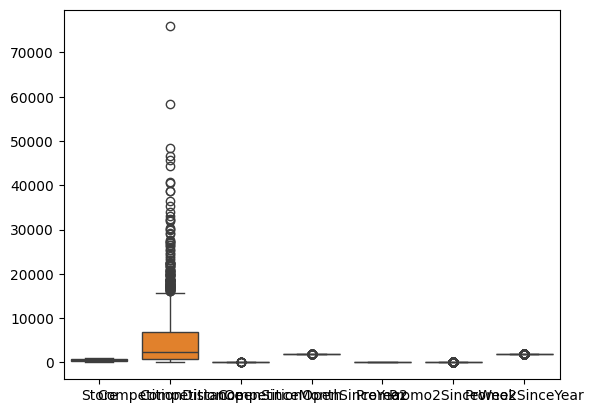

In [ ]:
#Univariate Analysis
## check the outliers
# Boxplot to detect outliers
sns.boxplot(data=store_data)
plt.show()


In [ ]:
# Check that the outliers.

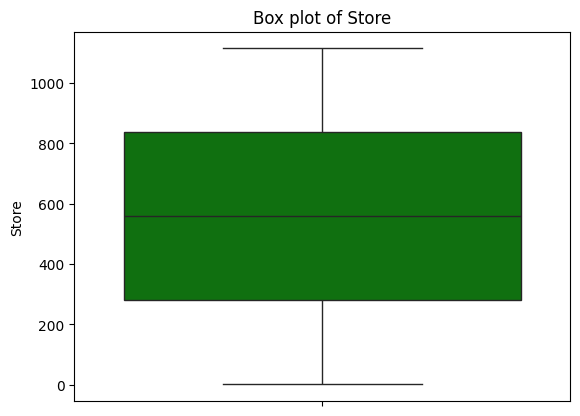

In [ ]:
sns.boxplot(data=store_data, y='Store', orient='h', color = 'green')
plt.title('Box plot of Store')
plt.show()

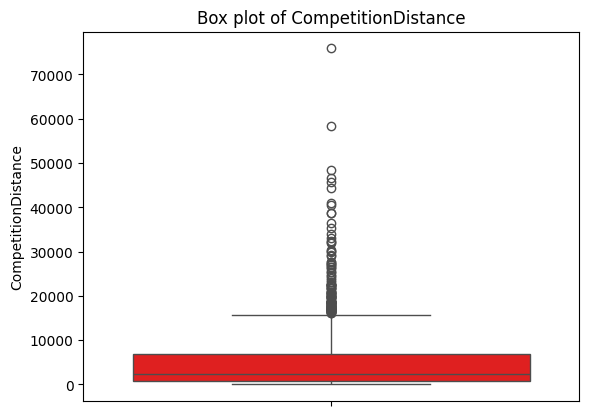

In [ ]:
sns.boxplot(data = store_data, y ='CompetitionDistance',color = 'red')
plt.title('Box plot of CompetitionDistance')
plt.show()

In [ ]:
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Assuming 'Dur. (ms)' is a column in your dataframe df
lower_range, upper_range = iqr_technique(store_data['CompetitionDistance'])

# Filter the dataframe based on the IQR
df = store_data[(store_data['CompetitionDistance'] > lower_range) & (store_data['CompetitionDistance'] < upper_range)]

In [ ]:
import numpy as np

# Define the IQR technique
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Assuming 'CompetitionDistance' is a column in your dataframe store_data
lower_range, upper_range = iqr_technique(store_data['CompetitionDistance'])

# Filter the dataframe based on the IQR
df_filtered = store_data[(store_data['CompetitionDistance'] >= lower_range) &
                         (store_data['CompetitionDistance'] <= upper_range)]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols = []
for col in categorical_cols:
    encoder = LabelEncoder()
    store_data[col] = encoder.fit_transform(store_data[col])

In [ ]:
store_data['StoreType'].value_counts().head()

,count
StoreType,
a,602
d,348
c,148
b,17


In [ ]:
store_data['Assortment'].value_counts().head()

,count
Assortment,
a,593
c,513
b,9


In [ ]:
store_data['PromoInterval'].value_counts().head()

,count
PromoInterval,
"Jan,Apr,Jul,Oct",879
"Feb,May,Aug,Nov",130
"Mar,Jun,Sept,Dec",106


In [ ]:
# Identify the StoreType User by Customers
StoreType_count = store_data['StoreType'].value_counts()
#Identify the StoreType_count
StoreType = StoreType_count.head()
print(StoreType)


StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64


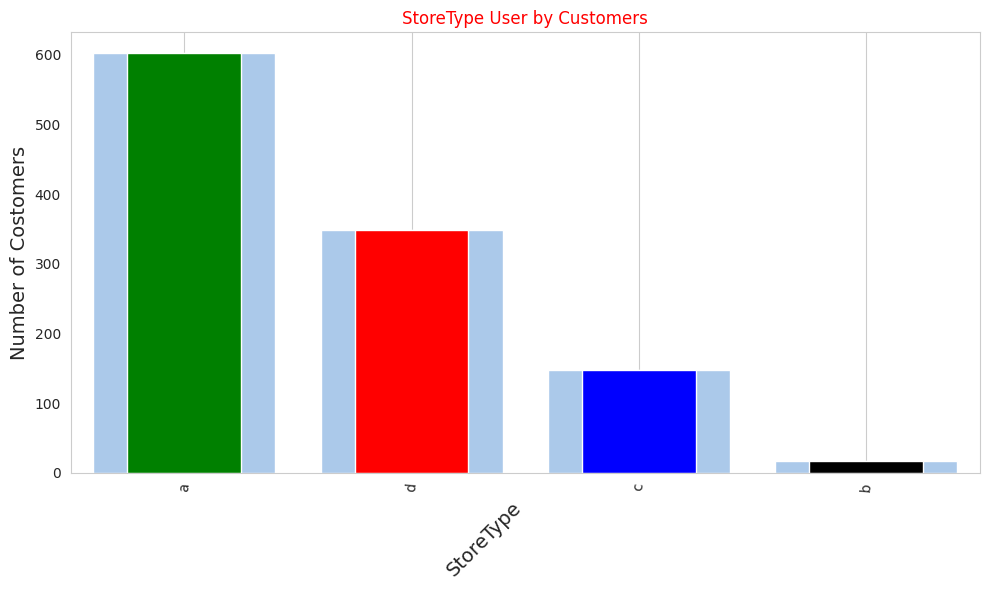

In [ ]:
# bar plot of the StoreType User by Customers
# set the style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")
# plot the StoreType
plt.figure(figsize=(10, 6))
sns.barplot(x=StoreType.index, y=StoreType.values)
plt.xlabel("StoreType")
plt.ylabel("Count")
# costomize the plot
StoreType.plot(kind='bar',color =['green','red','blue','black','pink'])
plt.xticks(rotation = 85)
plt.title("StoreType User by Customers", color= 'red')
plt.xlabel('StoreType',fontsize = 14, rotation=45,ha = 'right')
plt.ylabel('Number of Costomers',fontsize = 14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
# Identify the Assortment User by Customers
Assortment_count = store_data['Assortment'].value_counts()
#Identify the StoreType_count
Assortment_1 = Assortment_count.head()
print(Assortment_1)


Assortment
a    593
c    513
b      9
Name: count, dtype: int64


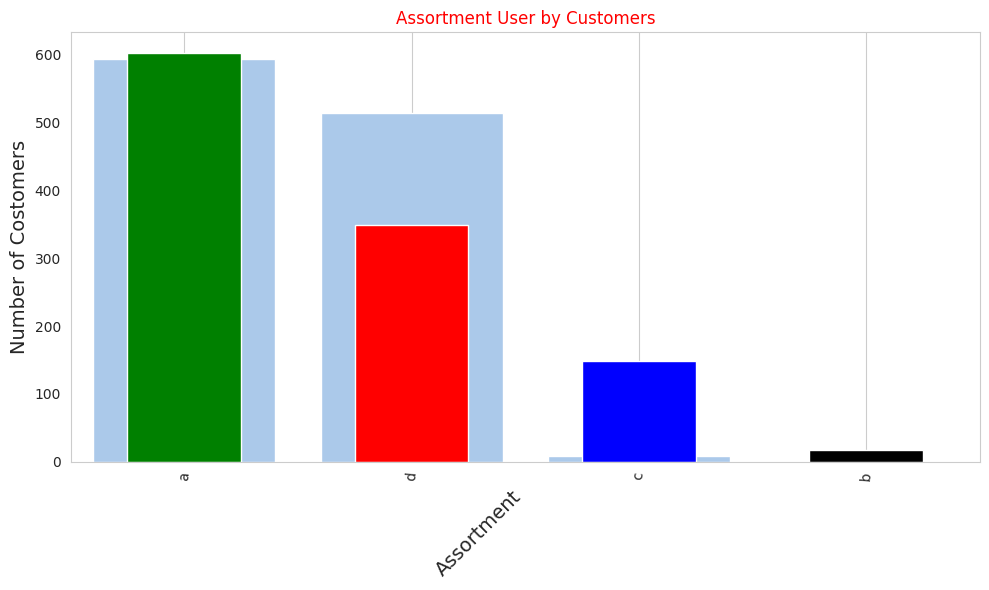

In [ ]:
# bar plot of the Assortment User by Customers
# set the style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")
# plot the StoreType
plt.figure(figsize=(10, 6))
sns.barplot(x=Assortment_1.index, y=Assortment_1.values)
plt.xlabel("Assortment")
plt.ylabel("Count")
# costomize the plot
StoreType.plot(kind='bar',color =['green','red','blue','black','pink'])
plt.xticks(rotation = 85)
plt.title("Assortment User by Customers", color= 'red')
plt.xlabel('Assortment',fontsize = 14, rotation=45,ha = 'right')
plt.ylabel('Number of Costomers',fontsize = 14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
# Identify the PromoInterval User by Customers
PromoInterval_count = store_data['PromoInterval'].value_counts()
#Identify the PromoInterval_count
PromoInterval_1 = PromoInterval_count.head()
print(PromoInterval_1)


PromoInterval
Jan,Apr,Jul,Oct     879
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: count, dtype: int64


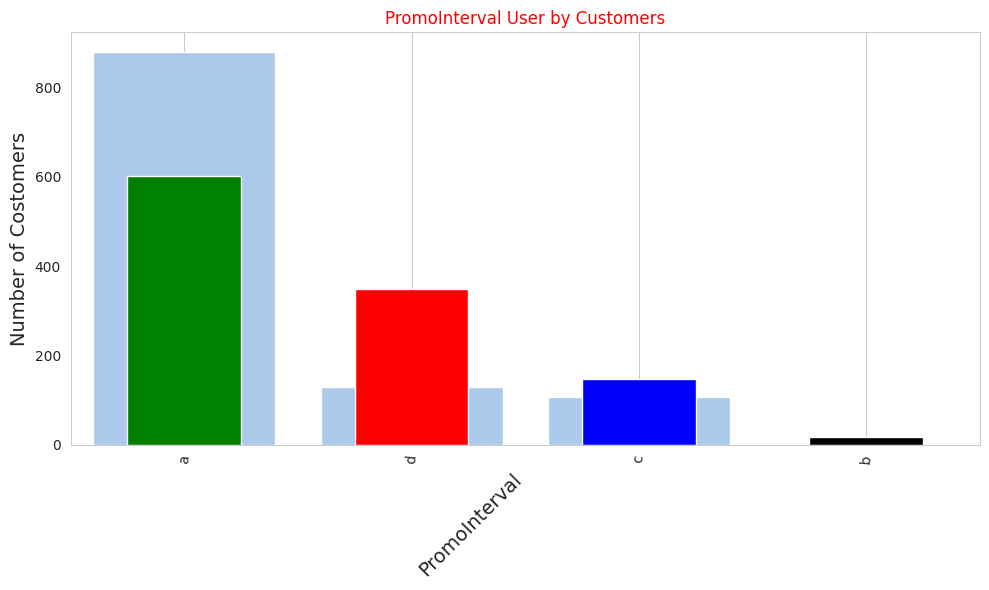

In [ ]:
# bar plot of the PromoInterval_1 User by Customers
# set the style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")
# plot the StoreType
plt.figure(figsize=(10, 6))
sns.barplot(x=PromoInterval_1.index, y=PromoInterval_1.values)
plt.xlabel("PromoInterval")
plt.ylabel("Count")
# costomize the plot
StoreType.plot(kind='bar',color =['green','red','blue','black','pink'])
plt.xticks(rotation = 85)
plt.title("PromoInterval User by Customers", color= 'red')
plt.xlabel('PromoInterval',fontsize = 14, rotation=45,ha = 'right')
plt.ylabel('Number of Costomers',fontsize = 14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
# Count the occurrences of each 'CompetitionDistance' value
CompetitionDistance_count = store_data['CompetitionDistance'].value_counts()

# Display the top 5 most frequent 'CompetitionDistance' values
CompetitionDistance_Type = CompetitionDistance_count.head()

# Print the result
print("Top 5 CompetitionDistance values and their counts:")
print(CompetitionDistance_Type)


Top 5 CompetitionDistance values and their counts:
CompetitionDistance
250.0     12
1200.0     9
190.0      8
50.0       8
350.0      8
Name: count, dtype: int64


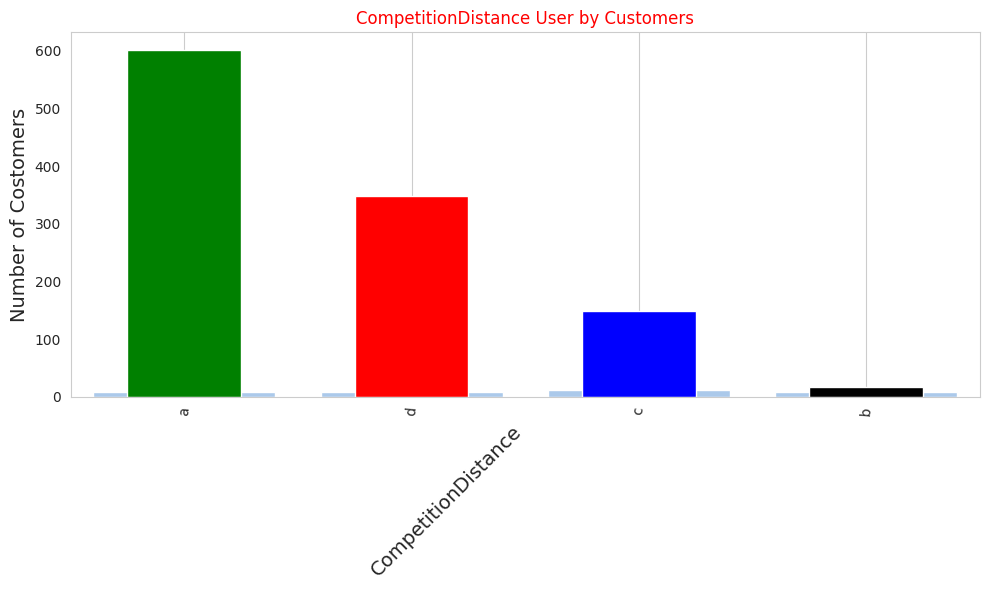

In [ ]:
# bar plot of the CompetitionDistance_Type User by Customers
# set the style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")
# plot the CompetitionDistance
plt.figure(figsize=(10, 6))
sns.barplot(x=CompetitionDistance_Type.index, y=CompetitionDistance_Type.values)
plt.xlabel("CompetitionDistance_Type")
plt.ylabel("Count")
# costomize the plot
StoreType.plot(kind='bar',color =['green','red','blue','black','pink'])
plt.xticks(rotation = 85)
plt.title("CompetitionDistance User by Customers", color= 'red')
plt.xlabel('CompetitionDistance',fontsize = 14, rotation=45,ha = 'right')
plt.ylabel('Number of Costomers',fontsize = 14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
# Store_data and train_data mearg

In [ ]:
mearg_data = pd.merge(store_data, train_data, on='Store')
mearg_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1


In [ ]:
#Merge_data shape
mearg_data.shape

(1017209, 18)

In [ ]:
# check for info
mearg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  float64
 8   Promo2SinceYear            1017209 non-null  float64
 9   PromoInterval              1017209 non-null  object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [ ]:
#Check for data type
mearg_data.dtypes

,0
Store,int64
StoreType,object
Assortment,object
CompetitionDistance,float64
CompetitionOpenSinceMonth,float64
CompetitionOpenSinceYear,float64
Promo2,int64
Promo2SinceWeek,float64
Promo2SinceYear,float64
PromoInterval,object


In [ ]:
#check for the nullvallus
mearg_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [ ]:
# Date column replace for the int type
mearg_data['Date'] = pd.to_datetime(mearg_data['Date'])


In [ ]:
mearg_data.dtypes

,0
Store,int64
StoreType,object
Assortment,object
CompetitionDistance,float64
CompetitionOpenSinceMonth,float64
CompetitionOpenSinceYear,float64
Promo2,int64
Promo2SinceWeek,float64
Promo2SinceYear,float64
PromoInterval,object


In [ ]:
# Check for the duplicate value
mearg_data.duplicated().sum()

0

In [ ]:
#Mearg data count
mearg_data.count()

,0
Store,1017209
StoreType,1017209
Assortment,1017209
CompetitionDistance,1017209
CompetitionOpenSinceMonth,1017209
CompetitionOpenSinceYear,1017209
Promo2,1017209
Promo2SinceWeek,1017209
Promo2SinceYear,1017209
PromoInterval,1017209


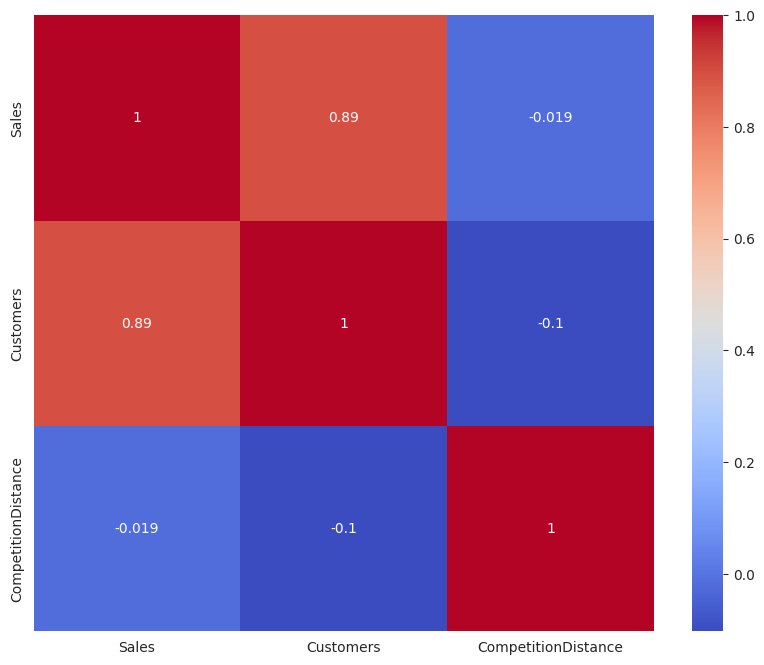

In [ ]:
corr_columns= ['Sales','Customers','CompetitionDistance']
# compute the correlation matrix
corr_matrix = mearg_data[corr_columns].corr()
# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

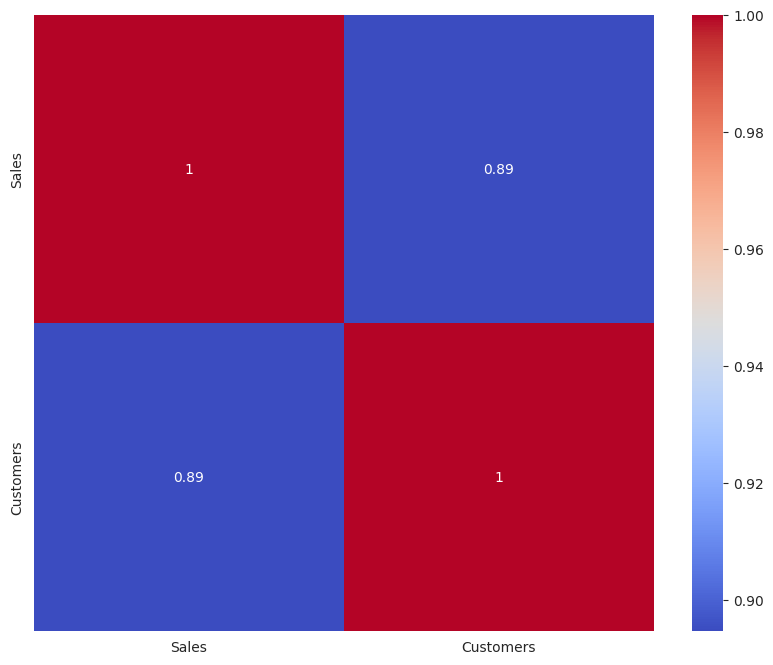

In [ ]:
#select the reievant numerical columns for correlation analysis
corr_columns = ['Sales','Customers']
# compute the correlation matrix
corr_matrix = mearg_data[corr_columns].corr()
# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

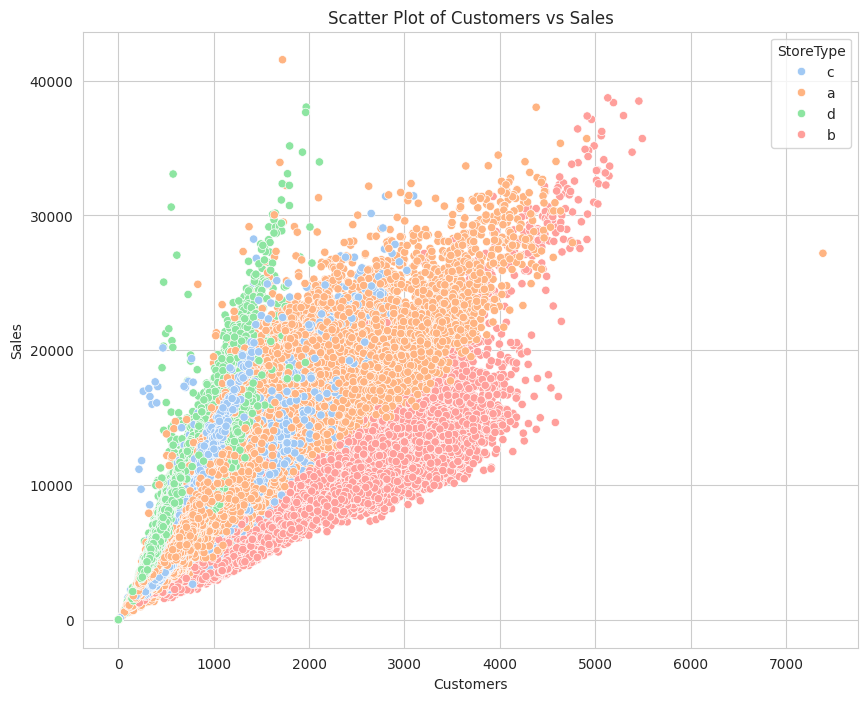

In [ ]:
#plot for the scatter plot to visualize the relationship
#deffrent color visualize
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Customers', y='Sales', data=mearg_data, hue='StoreType')
plt.title('Scatter Plot of Customers vs Sales')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()


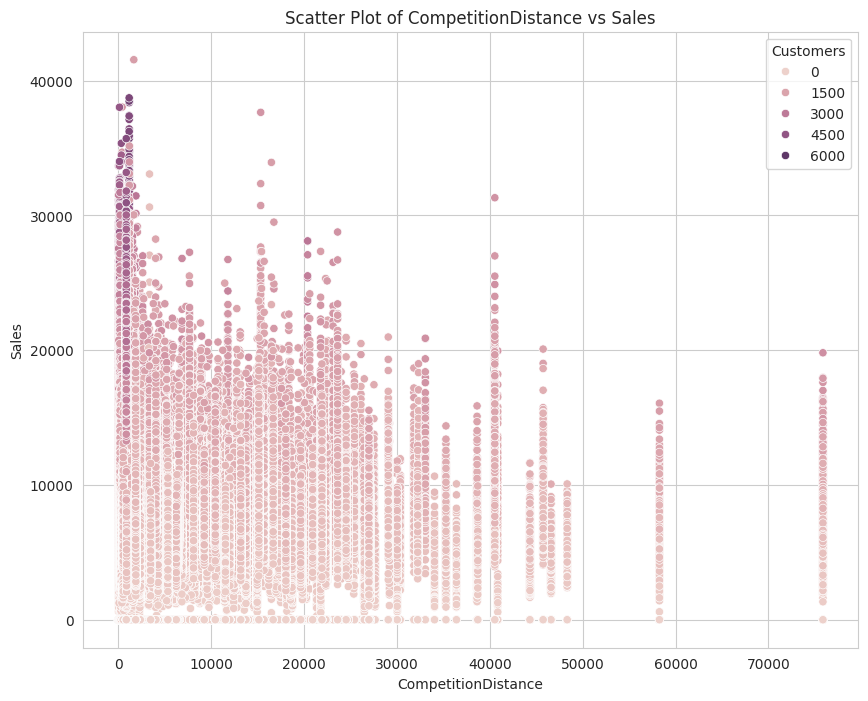

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=mearg_data, hue='Customers')
plt.title('Scatter Plot of CompetitionDistance vs Sales')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')
plt.show()


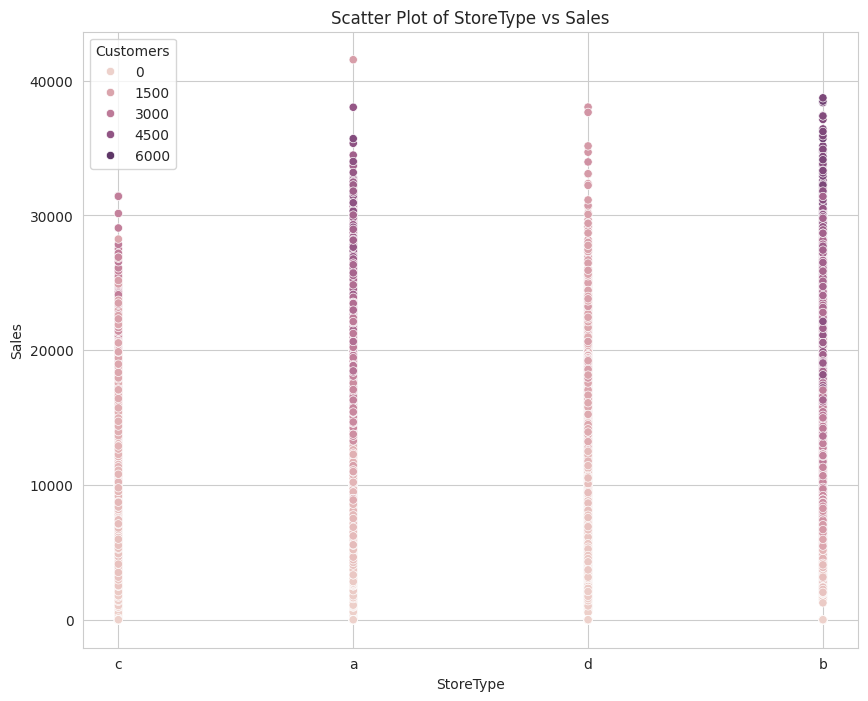

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='StoreType', y='Sales', data=mearg_data, hue='Customers',color =['green','red','blue','black',])
plt.title('Scatter Plot of StoreType vs Sales')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.show()


In [ ]:
#plt.figure(figsize=(10, 8))
#sns.barplot(x='StoreType', y='Sales', data=mearg_data, hue='Customers',color ='green')
#plt.title('Scatter Plot of StoreType vs Sales')
#plt.xlabel('StoreType')
#plt.ylabel('Sales')
#plt.show()


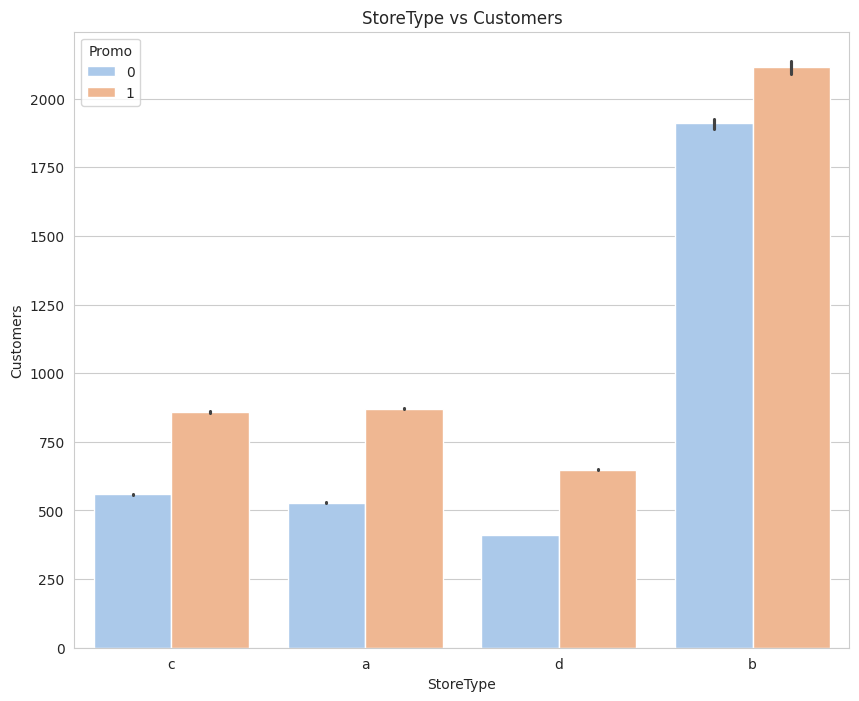

In [ ]:
#top store by customer increase during promotion with visvilize
#plt.show barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='StoreType', y='Customers', data=mearg_data, hue='Promo')
plt.title('StoreType vs Customers')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.show()


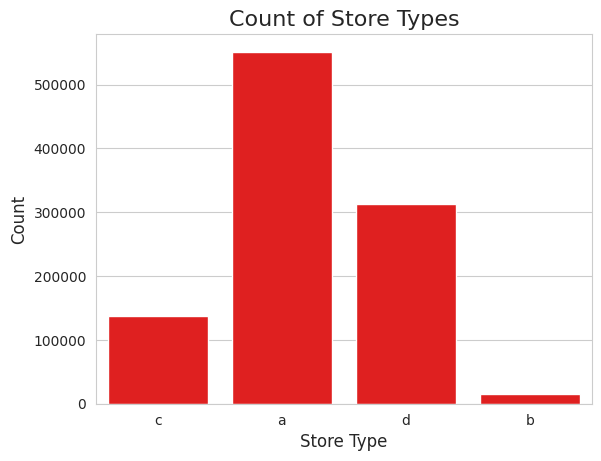

In [ ]:
sns.countplot(x='StoreType', data=mearg_data,color='red')
plt.title('Count of Store Types', fontsize=16)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

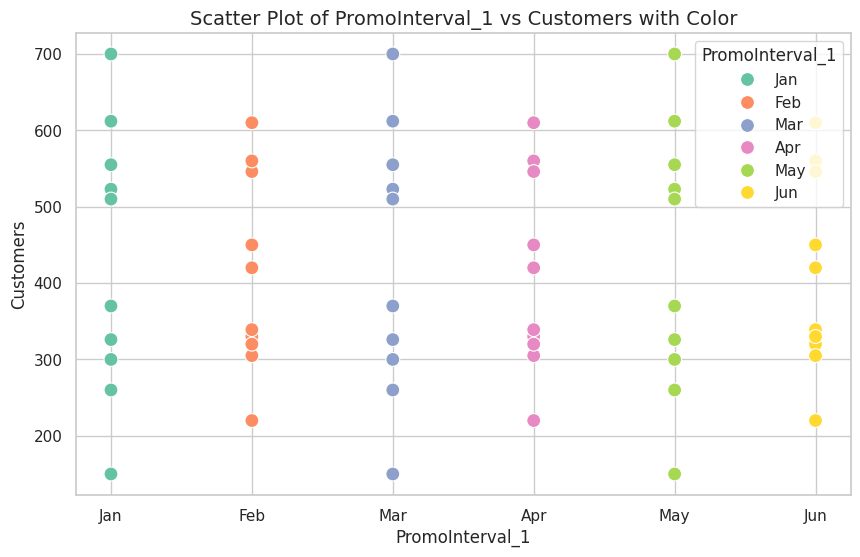

In [ ]:
# Set the style and color palette
sns.set(style="whitegrid")
sns.set_palette("Set2")

# PromoInterval_1 and Customers
data = pd.DataFrame({
    'PromoInterval_1': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',] * 10,
    'Customers': [555, 546, 523, 560, 612, 339, 326, 305, 300, 450, 150, 320, 370, 420, 510, 610, 700, 220, 260, 330] * 3
})

# the scatter plot with color based on PromoInterval_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PromoInterval_1', y='Customers', hue='PromoInterval_1', data=data, s=100)

plt.title("Scatter Plot of PromoInterval_1 vs Customers with Color", fontsize=14)
plt.xlabel("PromoInterval_1", fontsize=12)
plt.ylabel("Customers", fontsize=12)
plt.show()

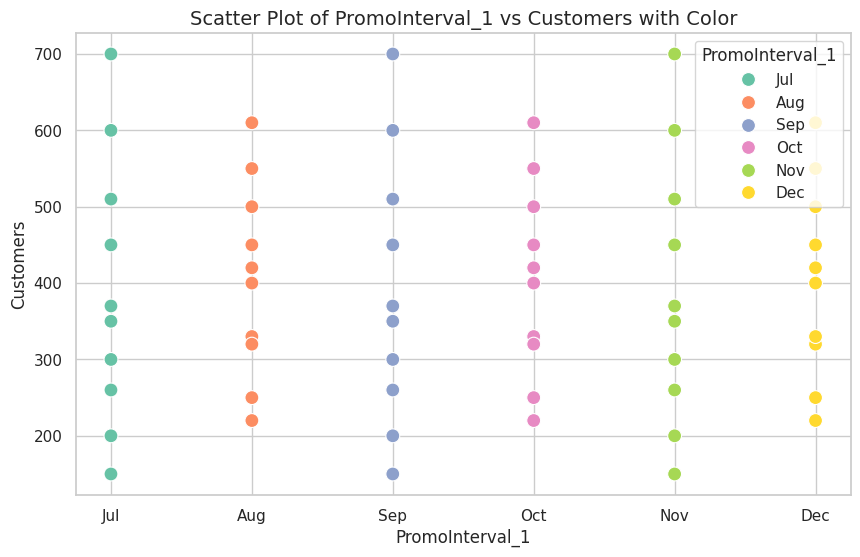

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# style and color palette
sns.set(style="whitegrid")
sns.set_palette("Set2")

# PromoInterval_1 and Customers
data = pd.DataFrame({
    'PromoInterval_1': ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',] * 10,
    'Customers': [200, 400, 350, 500, 450, 550, 600, 250, 300, 450, 150, 320, 370, 420, 510, 610, 700, 220, 260, 330] * 3
})

#the scatter plot with color based on PromoInterval_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PromoInterval_1', y='Customers', hue='PromoInterval_1', data=data, s=100)

plt.title("Scatter Plot of PromoInterval_1 vs Customers with Color", fontsize=14)
plt.xlabel("PromoInterval_1", fontsize=12)
plt.ylabel("Customers", fontsize=12)
plt.show()


In [ ]:
#customer ka data lene hai
mearg_data['Customers']

,Customers
0,555
1,546
2,523
3,560
4,612
...,...
1017204,339
1017205,326
1017206,300
1017207,305


In [ ]:
# Count the occurrences of each 'CompetitionDistance' value
CompetitionDistance_count = store_data['CompetitionDistance'].value_counts()

# the top 5 most frequent 'CompetitionDistance' values
CompetitionDistance_Type = CompetitionDistance_count.head()

# Print the result
print("Top 5 CompetitionDistance values and their counts:")
print(CompetitionDistance_Type)


Top 5 CompetitionDistance values and their counts:
CompetitionDistance
250.0     12
1200.0     9
190.0      8
50.0       8
350.0      8
Name: count, dtype: int64


In [ ]:
# Identify the StoreType User by Customers
CompetitionDistance_count = mearg_data['CompetitionDistance'].value_counts()
#Identify the StoreType_count
CompetitionDistance_Type = CompetitionDistance_count.head()
print(CompetitionDistance_Type)


CompetitionDistance
250.0     11120
50.0       7536
350.0      7536
1200.0     7374
190.0      7352
Name: count, dtype: int64


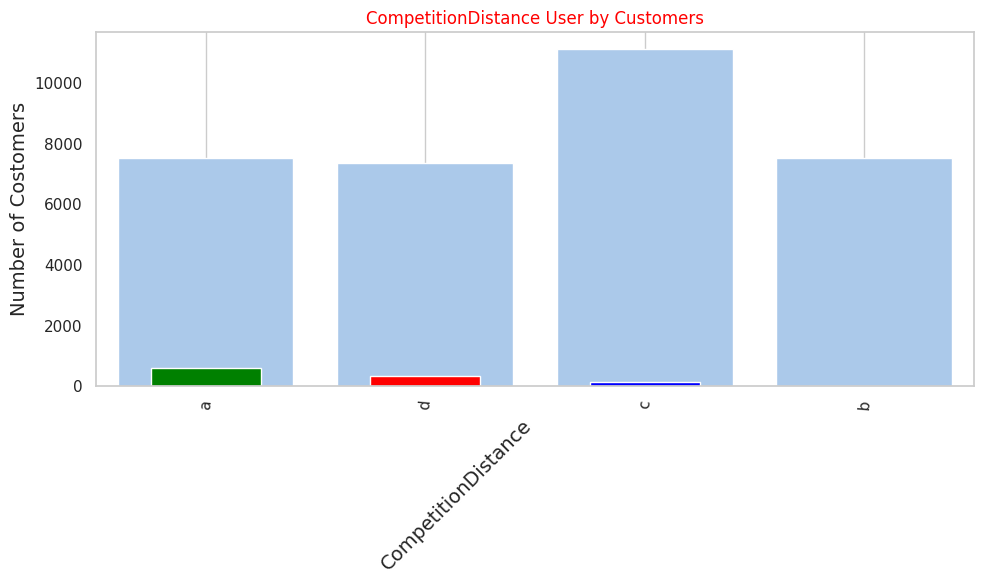

In [ ]:
# bar plot of the CompetitionDistance_Type User by Customers
# set the style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")
# plot the CompetitionDistance
plt.figure(figsize=(10, 6))
sns.barplot(x=CompetitionDistance_Type.index, y=CompetitionDistance_Type.values)
plt.xlabel("CompetitionDistance_Type")
plt.ylabel("Count")
# costomize the plot
StoreType.plot(kind='bar',color =['green','red','blue','black','pink'])
plt.xticks(rotation = 85)
plt.title("CompetitionDistance User by Customers", color= 'red')
plt.xlabel('CompetitionDistance',fontsize = 14, rotation=45,ha = 'right')
plt.ylabel('Number of Costomers',fontsize = 14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
mearg_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [ ]:
categorical_columns = mearg_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = mearg_data.select_dtypes(include=['number']).columns.tolist()

In [ ]:
categorical_columns

['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']

In [ ]:
numerical_columns

['Store',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday']

In [ ]:
# Import necessary libraries
import plotly.graph_objs as go
from plotly.offline import iplot



In [ ]:
# import graph objects as "go"
import plotly.graph_objs as go


In [ ]:
df_1 = mearg_data.iloc[:100,:]  # Make sure columns after index 100 are correct


In [ ]:
# Creating trace1
trace1 = go.Scatter(
                    x = df_1.Date,
                    y = df_1.Sales,
                    mode = "lines",
                    name = "Sales",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),)

# Creating trace2
trace2 = go.Scatter(
                    x = df_1.Date,
                    y = df_1.Customers,
                    mode = "lines+markers",
                    name = "Customers",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),)

data = [trace1, trace2]
layout = dict(title = 'Sales and Customers Over Time',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

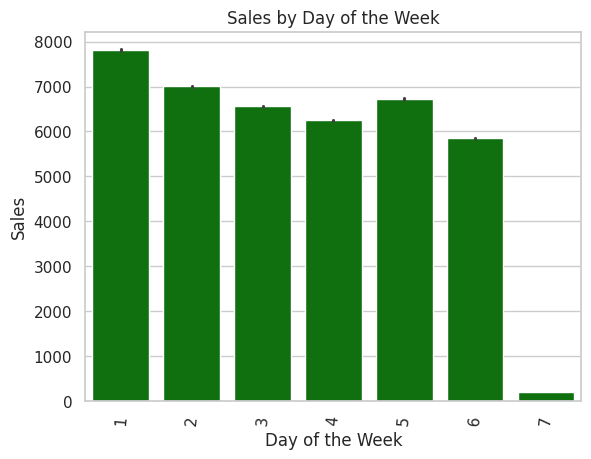

In [ ]:
# sales patterns by day of the week data is visualized properly
sns.barplot(x='DayOfWeek', y='Sales', data=mearg_data, color='green')
plt.xticks(rotation=85)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

## Pie chart

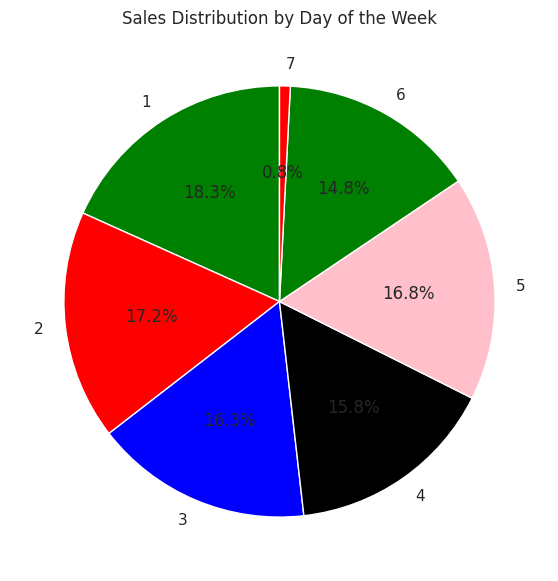

In [ ]:
Day_of_customer = mearg_data.groupby('DayOfWeek')['Customers'].sum()
Day_of_customer
# ploting the pie chart
plt.figure(figsize=(7,7))
plt.pie(Day_of_customer, labels=Day_of_customer.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue', 'black', 'pink'])
plt.title('Sales Distribution by Day of the Week')
plt.show()

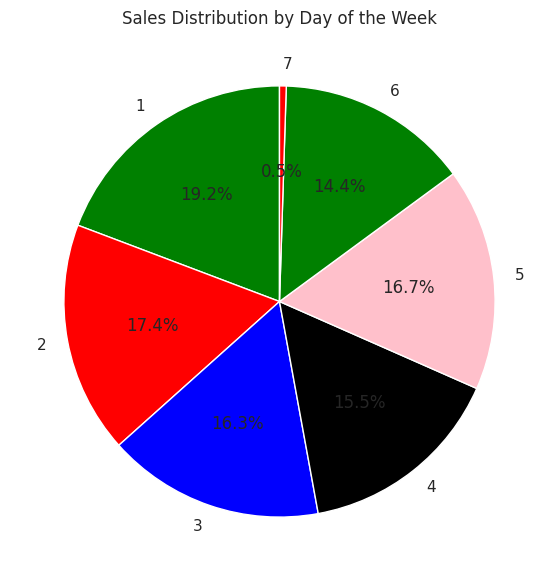

In [ ]:
import matplotlib.pyplot as plt

# Grouping the data by 'DayOfWeek' and summing up 'Sales'
day_sales = mearg_data.groupby('DayOfWeek')['Sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(7,7))
plt.pie(day_sales, labels=day_sales.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue', 'black', 'pink'])
plt.title('Sales Distribution by Day of the Week')
plt.show()


In [ ]:
print(mearg_data.columns)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')


In [ ]:
# Correct column name based on the print statement
customer_sales = mearg_data.groupby('Customers')['Sales'].agg(['sum', 'count']).reset_index()
customer_sales.columns = ['Customers', 'TotalSales', 'PurchaseFrequency']


## 3D Plot

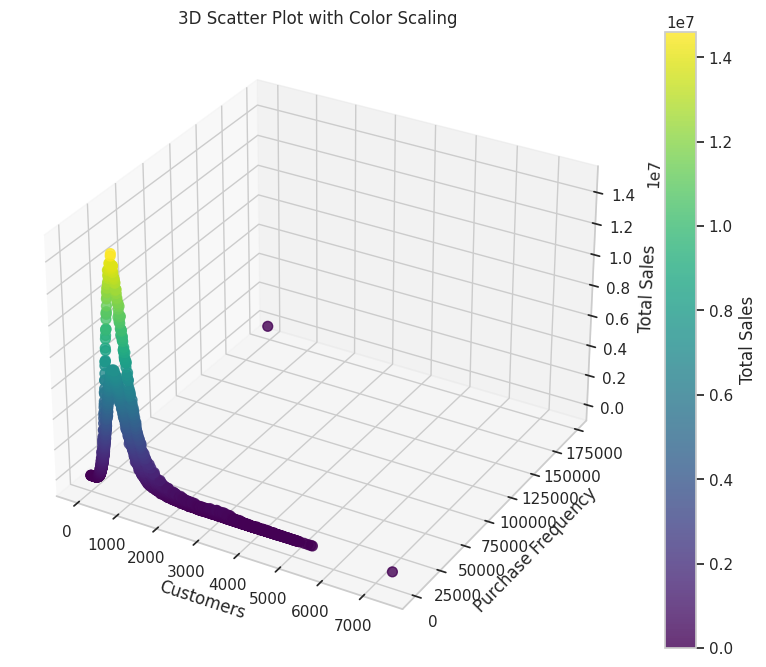

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Assuming mearg_data contains 'CustomerID' and 'Sales'
# Create the 3D scatter plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Defining the x, y, z axes
x = customer_sales['Customers']
y = customer_sales['PurchaseFrequency']
z = customer_sales['TotalSales']

sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=50, alpha=0.8)

# Adding color bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Total Sales')

# Setting axis labels
ax.set_xlabel('Customers')
ax.set_ylabel('Purchase Frequency')
ax.set_zlabel('Total Sales')

plt.title('3D Scatter Plot with Color Scaling')
plt.show()


In [ ]:
# mearg_data contains 'DayOfWeek' and 'Sales' columns
# Grouping the data by 'DayOfWeek' to get total sales
day_sales = mearg_data.groupby('DayOfWeek')['Sales'].sum().reset_index()


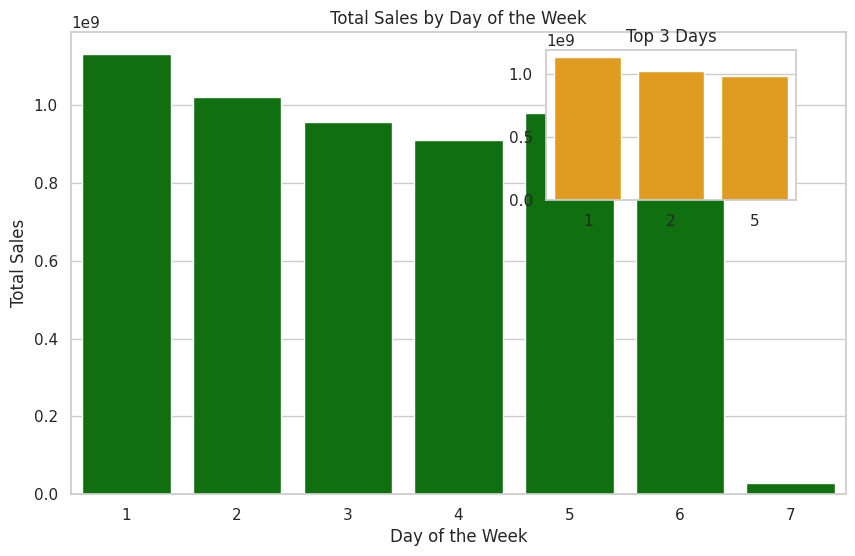

In [ ]:
# Creating the main plot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='DayOfWeek', y='Sales', data=day_sales, ax=ax, color='green')

# Main plot formatting
ax.set_title('Total Sales by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Sales')

# Inset plot: zoom in on the top-performing days

ax_inset = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # Adjust as needed for position/size

# showing the sales for the top 3 performing days
top_days = day_sales.nlargest(3, 'Sales')
sns.barplot(x='DayOfWeek', y='Sales', data=top_days, ax=ax_inset, color='orange')

# Inset plot formatting
ax_inset.set_title('Top 3 Days')
ax_inset.set_xlabel('')
ax_inset.set_ylabel('')

plt.show()


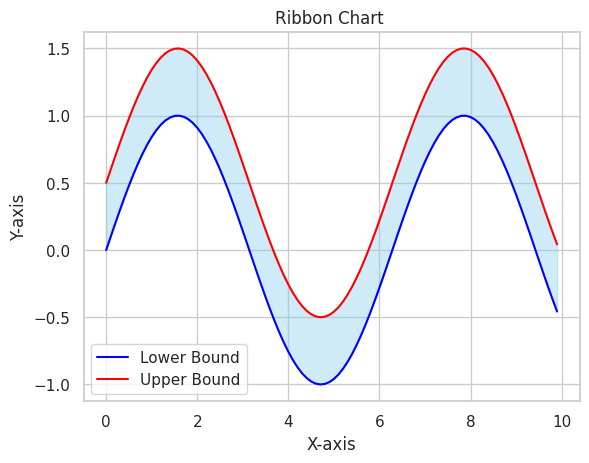

In [ ]:
# creat the ribben chart
# Data for the ribbon chart
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.sin(x) + 0.5

# Creating the ribbon chart
plt.fill_between(x, y1, y2, color="skyblue", alpha=0.4)
plt.plot(x, y1, label="Lower Bound", color="blue")
plt.plot(x, y2, label="Upper Bound", color="red")

# Adding labels and title
plt.title('Ribbon Chart ')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


In [ ]:
# Sample data loading (replace with your data)
data = pd.DataFrame({
    'date': pd.date_range(start='2024-01-01', periods=100, freq='D'),
    'customer_id': [f'C{i}' for i in range(1, 101)],
    'promo_applied': [1 if i % 3 == 0 else 0 for i in range(1, 101)],
    'sales_amount': [100 + i * 5 for i in range(1, 101)]
})

# Convert `date` to datetime if not already
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# Group by promo_applied to compare sales with and without promotions
promo_sales = data.groupby('promo_applied')['sales_amount'].sum().reset_index()
promo_sales.columns = ['Promotion Applied', 'Total Sales']
print(promo_sales)


   Promotion Applied  Total Sales
0                  0        23535
1                  1        11715


In [ ]:
avg_sales = data.groupby('promo_applied')['sales_amount'].mean().reset_index()
avg_sales.columns = ['Promotion Applied', 'Average Sales']
print(avg_sales)


   Promotion Applied  Average Sales
0                  0     351.268657
1                  1     355.000000


In [ ]:
# Identify new vs. existing customers
data['is_new_customer'] = data['customer_id'].duplicated(keep='first').astype(int)
# Analyze sales based on new or existing customers with promo
promo_customer_analysis = data.groupby(['promo_applied', 'is_new_customer'])['sales_amount'].sum().reset_index()
promo_customer_analysis.columns = ['Promotion Applied', 'Is New Customer', 'Total Sales']
print(promo_customer_analysis)

   Promotion Applied  Is New Customer  Total Sales
0                  0                0        23535
1                  1                0        11715


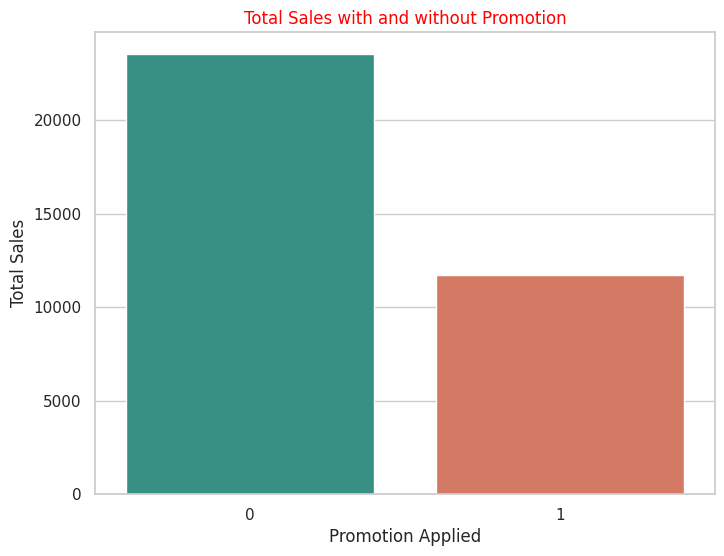

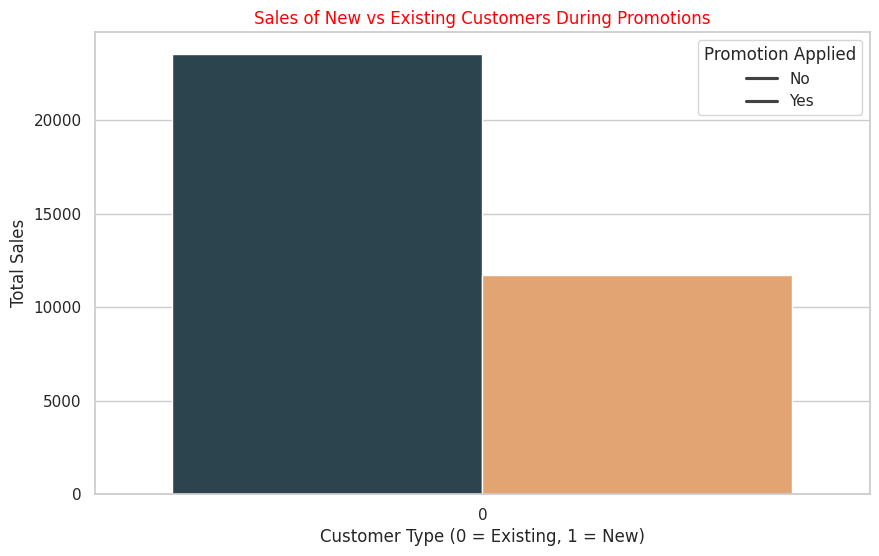

In [ ]:
# Define custom color palettes
promo_palette = sns.color_palette(["#2a9d8f", "#e76f51"])
customer_palette = sns.color_palette(["#264653", "#f4a261"])

# Plot sales with and without promotion
plt.figure(figsize=(8, 6))
sns.barplot(x='Promotion Applied', y='Total Sales', data=promo_sales, palette=promo_palette)
plt.title('Total Sales with and without Promotion',color='red')
plt.xlabel("Promotion Applied")
plt.ylabel("Total Sales")
plt.show()

# Plot new vs existing customer sales during promotions
plt.figure(figsize=(10, 6))
sns.barplot(x='Is New Customer', y='Total Sales', hue='Promotion Applied', data=promo_customer_analysis, palette=customer_palette)
plt.title('Sales of New vs Existing Customers During Promotions',color='red')
plt.xlabel("Customer Type (0 = Existing, 1 = New)")
plt.ylabel("Total Sales")
plt.legend(title="Promotion Applied", labels=["No", "Yes"])
plt.show()

In [ ]:
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2024-01-01 08:00', periods=500, freq='15min'),
    'customer_id': [f'C{i % 100}' for i in range(500)],
    'sales_amount': [50 + i * 5 % 100 for i in range(500)]
})

# Convert `timestamp` to datetime if not already
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
# Define store hours
store_open = "08:00"
store_close = "22:00"

# Extract time part of the timestamp to check against store hours
data['time'] = data['timestamp'].dt.time

# Filter data for opening and closing periods
data['time_period'] = data['time'].apply(
    lambda x: 'Opening Hours' if pd.to_datetime(str(x)) < pd.to_datetime(store_open) else
              'Closing Hours' if pd.to_datetime(str(x)) >= pd.to_datetime(store_close) else 'Regular Hours'
)

In [ ]:
# Calculate total sales and unique customers for each period
customer_behavior = data.groupby('time_period').agg(
    total_sales=('sales_amount', 'sum'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

print(customer_behavior)

     time_period  total_sales  unique_customers
0  Closing Hours         3900                24
1  Opening Hours        15600                48
2  Regular Hours        29250                76


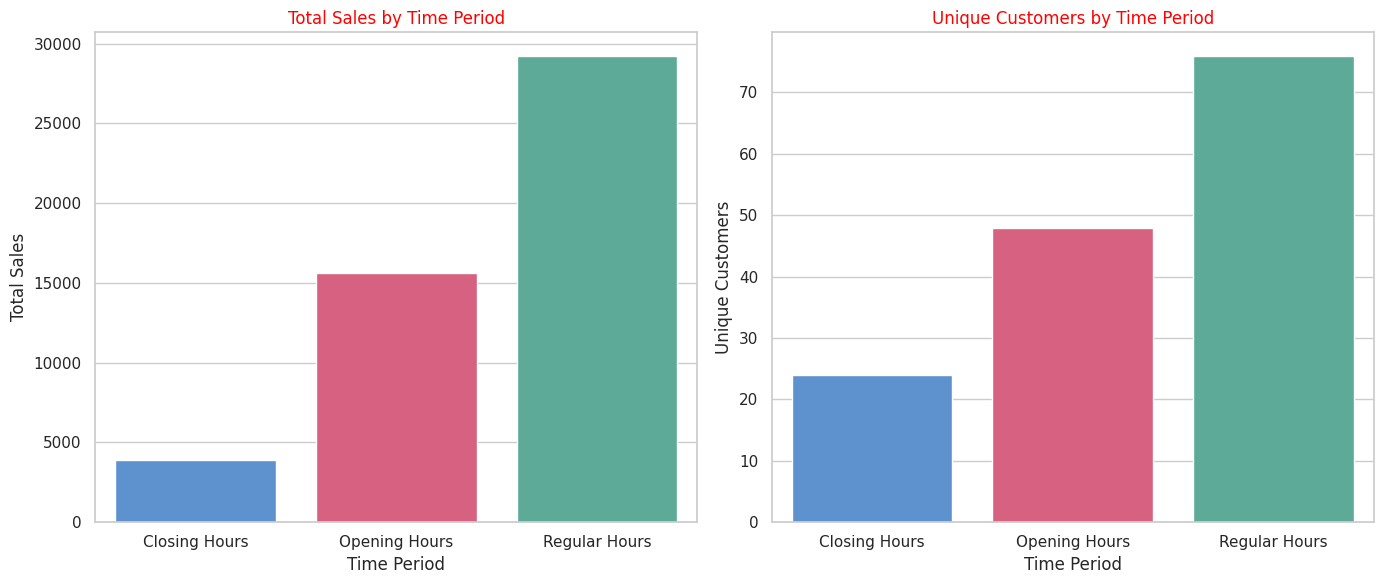

In [ ]:
 # color palette
palette = sns.color_palette(["#4a90e2", "#e94e77", "#50b7a0"])

# Plot total sales and unique customers by time period
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='time_period', y='total_sales', data=customer_behavior, palette=palette, ax=ax[0])
ax[0].set_title('Total Sales by Time Period', color='red')
ax[0].set_xlabel("Time Period")
ax[0].set_ylabel("Total Sales")

sns.barplot(x='time_period', y='unique_customers', data=customer_behavior, palette=palette, ax=ax[1])
ax[1].set_title('Unique Customers by Time Period', color='red')
ax[1].set_xlabel("Time Period")
ax[1].set_ylabel("Unique Customers")

plt.tight_layout()
plt.show()

**bold text**## Task 02

# **`Task 02`**

In [ ]:
# model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder



In [ ]:
# Export the DataFrame to an Excel file
mearg_data.to_csv('Task_02_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('Task_02_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>